In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset
file_path = "Churn.xlsx"
df = pd.read_excel(file_path, sheet_name="Churn (1)")

In [3]:
# Display first few rows
print("First five rows of the dataset:")
print(df.head())

First five rows of the dataset:
   Unnamed: 0 state      area.code  account.length voice.plan  voice.messages  \
0           1    KS  area_code_415             128        yes              25   
1           2    OH  area_code_415             107        yes              26   
2           3    NJ  area_code_415             137         no               0   
3           4    OH  area_code_408              84         no               0   
4           5    OK  area_code_415              75         no               0   

  intl.plan  intl.mins  intl.calls  intl.charge  ...  day.calls  day.charge  \
0        no       10.0           3         2.70  ...        110       45.07   
1        no       13.7           3         3.70  ...        123       27.47   
2        no       12.2           5         3.29  ...        114       41.38   
3       yes        6.6           7         1.78  ...         71        50.9   
4       yes       10.1           3         2.73  ...        113       28.34   

  eve.

In [4]:
# Check dataset shape
print(f"\nDataset contains {df.shape[0]} rows and {df.shape[1]} columns.\n")


Dataset contains 5000 rows and 21 columns.



In [5]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Unnamed: 0        0
state             0
area.code         0
account.length    0
voice.plan        0
voice.messages    0
intl.plan         0
intl.mins         0
intl.calls        0
intl.charge       0
day.mins          0
day.calls         0
day.charge        0
eve.mins          0
eve.calls         0
eve.charge        0
night.mins        0
night.calls       0
night.charge      0
customer.calls    0
churn             0
dtype: int64


In [6]:
# Drop unnecessary column
df.drop(columns=["Unnamed: 0"], inplace=True)

In [7]:
# Convert categorical columns
df["area.code"] = df["area.code"].astype("category")
df["voice.plan"] = df["voice.plan"].map({"yes": 1, "no": 0})
df["intl.plan"] = df["intl.plan"].map({"yes": 1, "no": 0})
df["churn"] = df["churn"].map({"yes": 1, "no": 0})

In [8]:
# Convert object columns to numeric
df["day.charge"] = pd.to_numeric(df["day.charge"], errors="coerce")
df["eve.mins"] = pd.to_numeric(df["eve.mins"], errors="coerce")

In [9]:
# Fill missing values (if any)
df.fillna(df.mean(), inplace=True)

C:\Users\kaush\AppData\Local\Temp\ipykernel_37564\1596137309.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


In [10]:
# Summary of dataset
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   state           5000 non-null   object  
 1   area.code       5000 non-null   category
 2   account.length  5000 non-null   int64   
 3   voice.plan      5000 non-null   int64   
 4   voice.messages  5000 non-null   int64   
 5   intl.plan       5000 non-null   int64   
 6   intl.mins       5000 non-null   float64 
 7   intl.calls      5000 non-null   int64   
 8   intl.charge     5000 non-null   float64 
 9   day.mins        5000 non-null   float64 
 10  day.calls       5000 non-null   int64   
 11  day.charge      5000 non-null   float64 
 12  eve.mins        5000 non-null   float64 
 13  eve.calls       5000 non-null   int64   
 14  eve.charge      5000 non-null   float64 
 15  night.mins      5000 non-null   float64 
 16  night.calls     5000 non-null   int64   
 17  

In [11]:

print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
state             0
area.code         0
account.length    0
voice.plan        0
voice.messages    0
intl.plan         0
intl.mins         0
intl.calls        0
intl.charge       0
day.mins          0
day.calls         0
day.charge        0
eve.mins          0
eve.calls         0
eve.charge        0
night.mins        0
night.calls       0
night.charge      0
customer.calls    0
churn             0
dtype: int64


In [12]:
print("\nStatistical Summary:")
print(df.describe())


Statistical Summary:
       account.length   voice.plan  voice.messages    intl.plan    intl.mins  \
count      5000.00000  5000.000000     5000.000000  5000.000000  5000.000000   
mean        100.25860     0.264600        7.755200     0.094600    10.261780   
std          39.69456     0.441164       13.546393     0.292691     2.761396   
min           1.00000     0.000000        0.000000     0.000000     0.000000   
25%          73.00000     0.000000        0.000000     0.000000     8.500000   
50%         100.00000     0.000000        0.000000     0.000000    10.300000   
75%         127.00000     1.000000       17.000000     0.000000    12.000000   
max         243.00000     1.000000       52.000000     1.000000    20.000000   

        intl.calls  intl.charge     day.mins    day.calls   day.charge  \
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000   
mean      4.435200     2.771196   180.288900   100.029400    30.653501   
std       2.456788     0.745514    

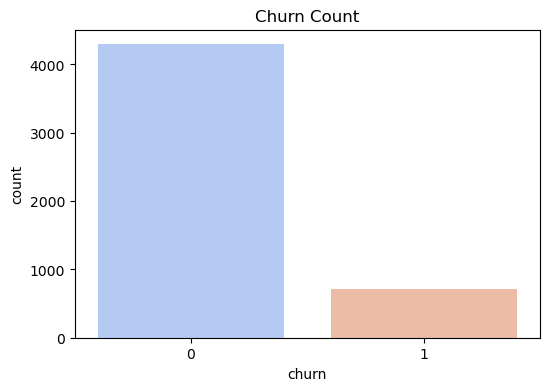

In [13]:
# Churn distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='churn', data=df, palette='coolwarm')
plt.title("Churn Count")
plt.show()

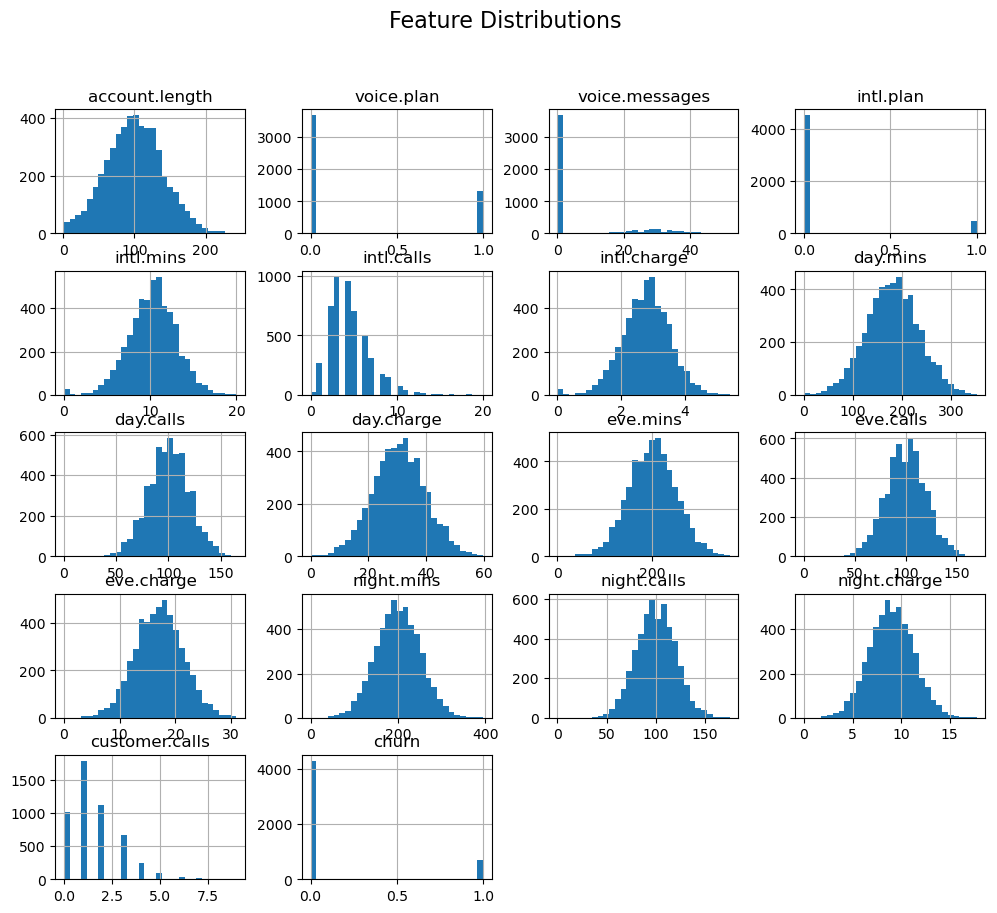

In [14]:

# Distribution of numerical features
df.hist(figsize=(12, 10), bins=30)
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

C:\Users\kaush\AppData\Local\Temp\ipykernel_37564\400643303.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)


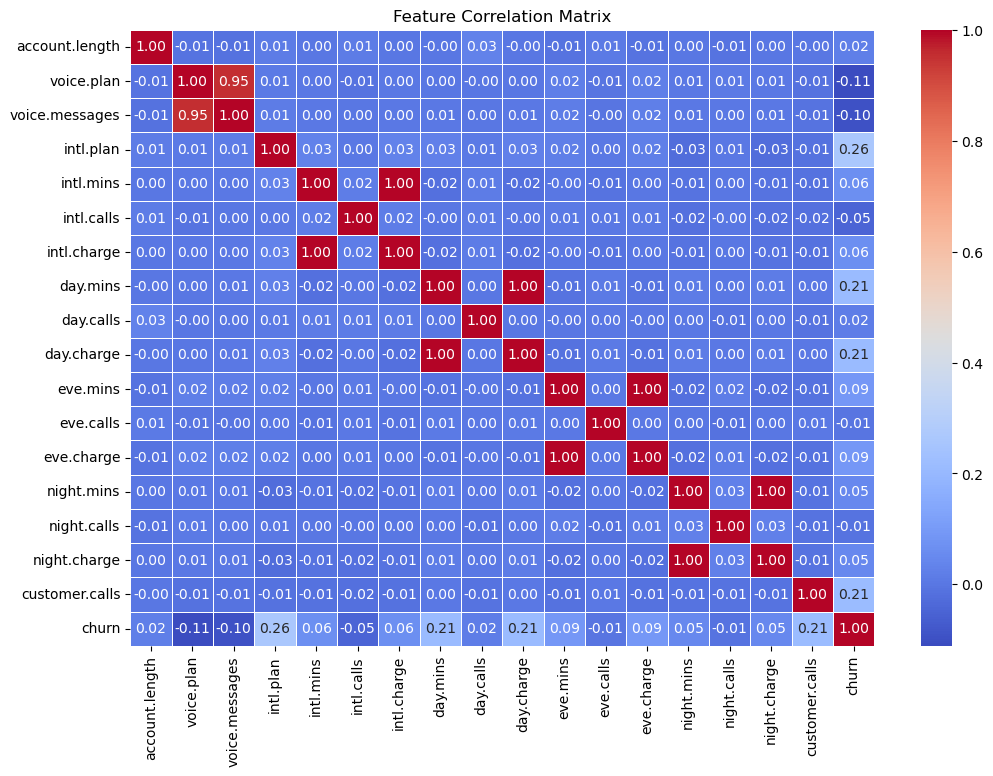

In [15]:
# Correlation Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()


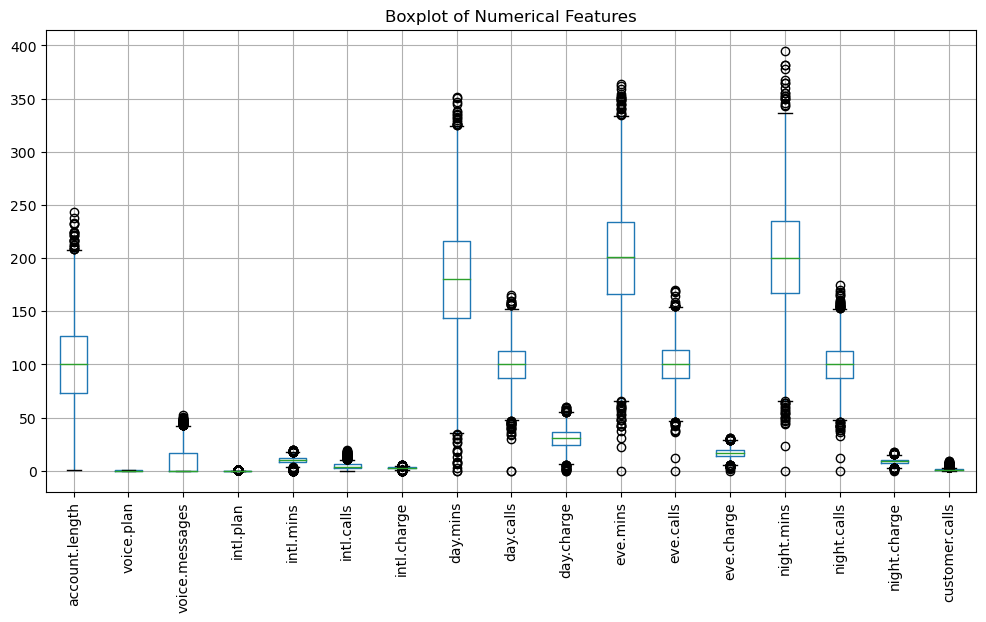

In [16]:
# Boxplot to check for outliers
plt.figure(figsize=(12, 6))
df.drop(columns=["churn"]).boxplot(rot=90)
plt.title("Boxplot of Numerical Features")
plt.show()

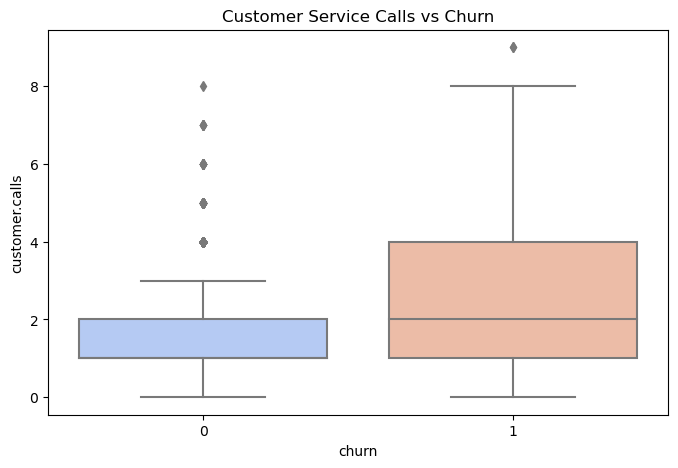

In [17]:
# Checking customer service calls and churn impact
plt.figure(figsize=(8, 5))
sns.boxplot(x="churn", y="customer.calls", data=df, palette="coolwarm")
plt.title("Customer Service Calls vs Churn")
plt.show()

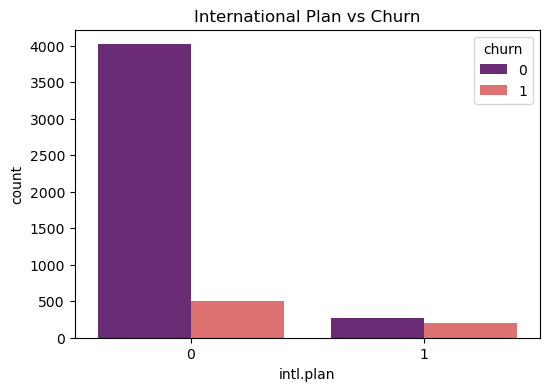

In [18]:
# Checking impact of international plan on churn
plt.figure(figsize=(6,4))
sns.countplot(x="intl.plan", hue="churn", data=df, palette="magma")
plt.title("International Plan vs Churn")
plt.show()

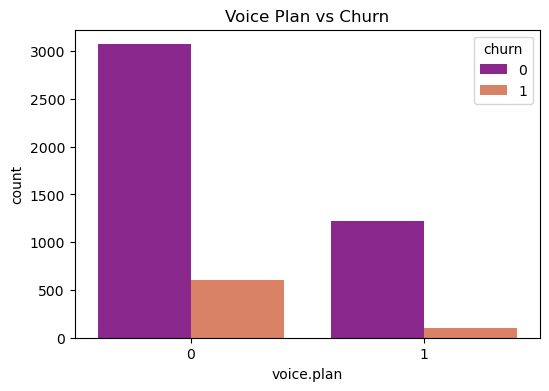

In [19]:
# Checking impact of voice plan on churn
plt.figure(figsize=(6,4))
sns.countplot(x="voice.plan", hue="churn", data=df, palette="plasma")
plt.title("Voice Plan vs Churn")
plt.show()

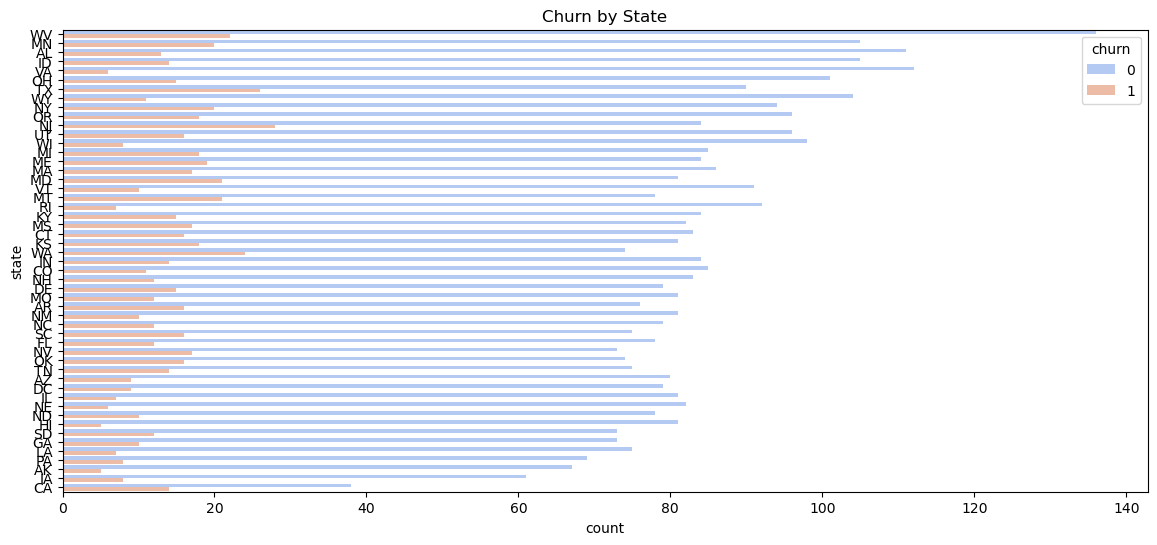

In [20]:
# Checking churn by state
plt.figure(figsize=(14, 6))
sns.countplot(y=df["state"], hue=df["churn"], palette="coolwarm", order=df["state"].value_counts().index)
plt.title("Churn by State")
plt.show()